In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_input_path = '/content/drive/My Drive/Colab Notebooks/4_Influencing_Signal/data-hrv-swell-kw/'
img_path = '/content/drive/My Drive/Colab Notebooks/4_Influencing_Signal/plots/'
file_name = 'D - Physiology features (HR_HRV_SCL - final).csv'

In [ ]:
import pandas as pd

df_all = pd.read_csv(folder_input_path + file_name)
df_all.head()

,PP,C,Condition,timestamp,HR,RMSSD,SCL
0,PP1,1,R,20120918T131600000,999,999.000000,80.239727
1,PP1,1,R,20120918T131700000,61,0.061420,77.365127
2,PP1,1,R,20120918T131800000,64,0.049663,77.359559
3,PP1,1,R,20120918T131900000,60,0.052487,76.728772
4,PP1,1,R,20120918T132000000,61,0.051189,76.512877


In [ ]:
# Mapping for Condition to Condition_Name
condition_name_map = {
    'I': 'Interruptions',
    'T': 'Time pressure',
    'R': 'Relax',
    'N': 'Neutral'
}

# Mapping for Condition to Stress_Name
stress_name_map = {
    'I': 'Stress',
    'T': 'Stress',
    'R': 'No Stress',
    'N': 'No Stress'
}

# Apply the mapping to create Condition_Name column
df_all['Condition_Name'] = df_all['Condition'].map(condition_name_map)

# Assign Stress_Indicator based on Condition
df_all['Stress_Name'] = df_all['Condition'].map(stress_name_map)

df_clean = df_all[df_all['HR'] != 999].copy()


In [ ]:
# Calculate basic statistics per 'PP' attribute for both 'Stress' and 'No Stress'
stats_df = df_clean.groupby(['PP', 'Stress_Name'])['HR'].agg(['min', 'max', 'mean', 'median', 'std'])

# Since we want 'PP' and 'Stress_Name' as columns, we reset the index
stats_df.reset_index(inplace=True)

# Remap 'PP' column values
stats_df['PP'] = stats_df['PP'].str.replace(r'^PP(\d)$', r'PP0\1', regex=True)

# Reset the index if PP is not already a column
stats_df.reset_index(inplace=True)

# Sort the DataFrame by the PP column
stats_df.sort_values(by='PP', inplace=True)

# Display the resulting DataFrame
stats_df.head()


,index,PP,Stress_Name,min,max,mean,median,std
0,0,PP01,No Stress,60,74,66.933333,67.0,2.934125
1,1,PP01,Stress,58,71,63.857143,63.0,2.901149
20,20,PP02,Stress,69,81,73.672414,73.0,2.651633
19,19,PP02,No Stress,64,82,75.017544,76.0,3.578164
32,32,PP03,Stress,87,107,95.375000,96.0,5.969579


In [ ]:
latex_str = stats_df.to_latex(index=False)
print(latex_str)

\begin{tabular}{rllrrrrr}
\toprule
 index &   PP & Stress\_Name &  min &  max &      mean &  median &      std \\
\midrule
     0 & PP01 &   No Stress &   60 &   74 & 66.933333 &    67.0 & 2.934125 \\
     1 & PP01 &      Stress &   58 &   71 & 63.857143 &    63.0 & 2.901149 \\
    20 & PP02 &      Stress &   69 &   81 & 73.672414 &    73.0 & 2.651633 \\
    19 & PP02 &   No Stress &   64 &   82 & 75.017544 &    76.0 & 3.578164 \\
    32 & PP03 &      Stress &   87 &  107 & 95.375000 &    96.0 & 5.969579 \\
    31 & PP03 &   No Stress &   72 &   83 & 77.200000 &    75.0 & 4.604346 \\
    34 & PP04 &      Stress &   58 &   61 & 59.750000 &    60.0 & 1.500000 \\
    33 & PP04 &   No Stress &   58 &   73 & 61.272727 &    60.0 & 4.149480 \\
    36 & PP05 &      Stress &   63 &   80 & 68.476190 &    67.0 & 3.515950 \\
    35 & PP05 &   No Stress &   61 &   80 & 73.617647 &    75.0 & 5.466231 \\
    38 & PP06 &      Stress &   57 &   70 & 62.127660 &    62.0 & 2.723625 \\
    37 & PP06 &   N

<ipython-input-87-dcd8ff504aea>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_str = stats_df.to_latex(index=False)


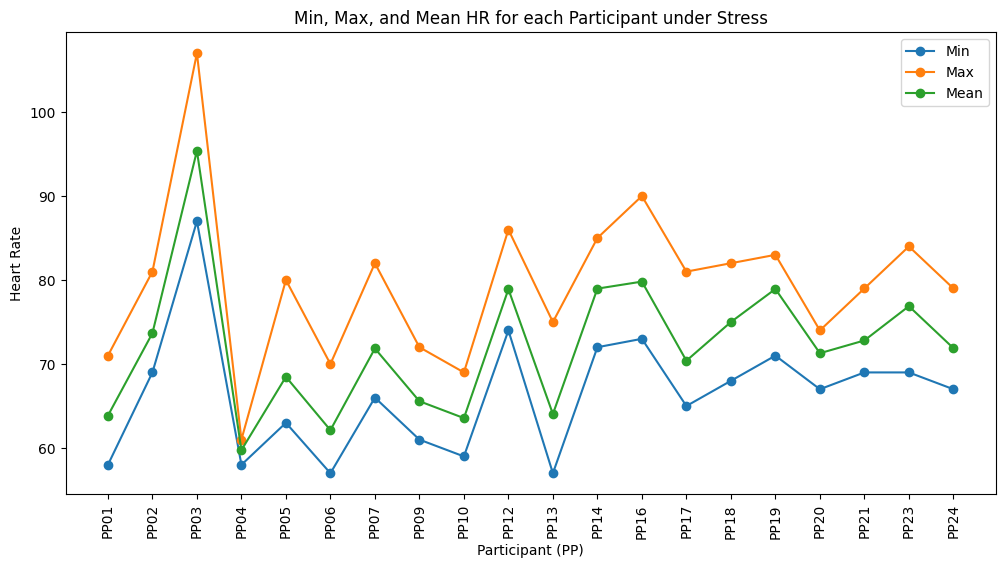

In [ ]:
import matplotlib.pyplot as plt

# Using the stats_df DataFrame from before, which contains the min, max, and mean for each PP and Stress_Name
# We'll filter for 'Stress' only for the sake of clarity in the plot
stats_stress = stats_df[stats_df['Stress_Name'] == 'Stress']

# Setting the index to PP for easier plotting
stats_stress.set_index('PP', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

# For each statistic, we plot a separate line
plt.plot(stats_stress['min'], label='Min', marker='o')
plt.plot(stats_stress['max'], label='Max', marker='o')
plt.plot(stats_stress['mean'], label='Mean', marker='o')

# Adding legend and labels
plt.legend()
plt.title('Min, Max, and Mean HR for each Participant under Stress')
plt.xlabel('Participant (PP)')
plt.ylabel('Heart Rate')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


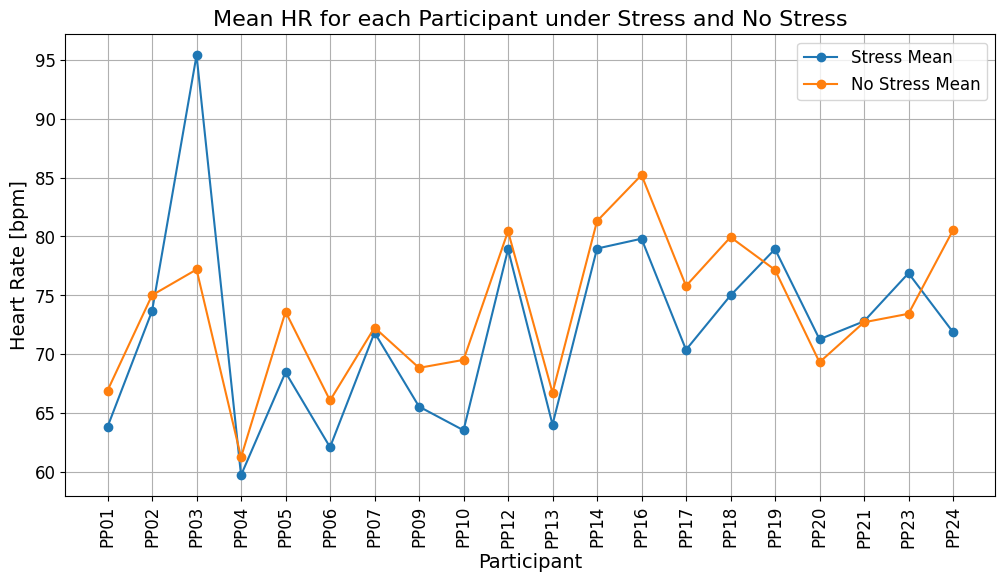

In [ ]:
import matplotlib.pyplot as plt

# Filter for 'Stress' and 'No Stress' and make sure we're working with copies to avoid the SettingWithCopyWarning
stats_stress = stats_df[stats_df['Stress_Name'] == 'Stress'].copy()
stats_no_stress = stats_df[stats_df['Stress_Name'] == 'No Stress'].copy()

# Sort both DataFrames by 'PP' to ensure alignment
stats_stress.sort_values('PP', inplace=True)
stats_no_stress.sort_values('PP', inplace=True)

# Ensure both DataFrames have the same 'PP' values and are sorted
common_pp = set(stats_stress['PP']).intersection(set(stats_no_stress['PP']))
stats_stress = stats_stress[stats_stress['PP'].isin(common_pp)].set_index('PP')
stats_no_stress = stats_no_stress[stats_no_stress['PP'].isin(common_pp)].set_index('PP')

# Plot for 'Stress' and 'No Stress'
plt.figure(figsize=(12, 6))

# Plotting the mean heart rates
plt.plot(stats_stress.index, stats_stress['mean'], label='Stress Mean', marker='o')
plt.plot(stats_no_stress.index, stats_no_stress['mean'], label='No Stress Mean', marker='o')

# Adding legend and labels
plt.legend(fontsize=12)
plt.title('Mean HR for each Participant under Stress and No Stress', fontsize=16)
plt.xlabel('Participant', fontsize=14)
plt.ylabel('Heart Rate [bpm]', fontsize=14)
plt.yticks(fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)
plt.grid()

plt.savefig(img_path + 'swell_hr_compare_mean_stress_no_stress.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


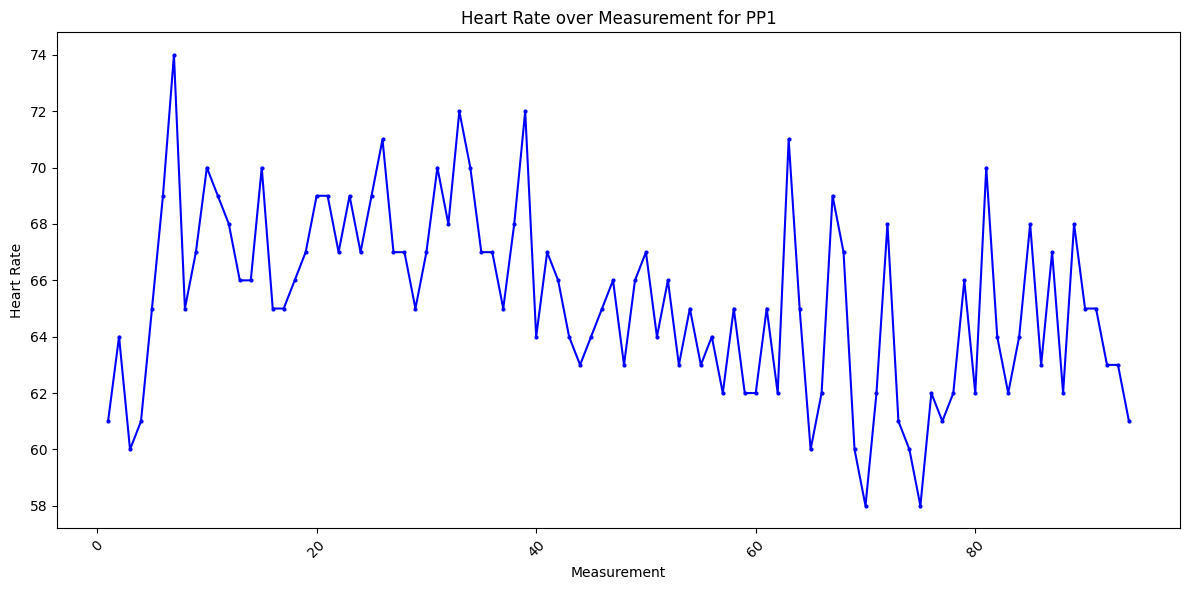

In [ ]:
import matplotlib.pyplot as plt

df = df_clean[df_clean['PP'] == 'PP1'].copy()

# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%dT%H%M%S%f')

df['measurement_id'] = range(1, len(df) + 1)


# Attempt plotting again
plt.figure(figsize=(12, 6))
plt.plot(df['measurement_id'], df['HR'], marker='o', linestyle='-', markersize=2, color='blue')
plt.title('Heart Rate over Measurement for PP1')
plt.xlabel('Measurement')
plt.ylabel('Heart Rate')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

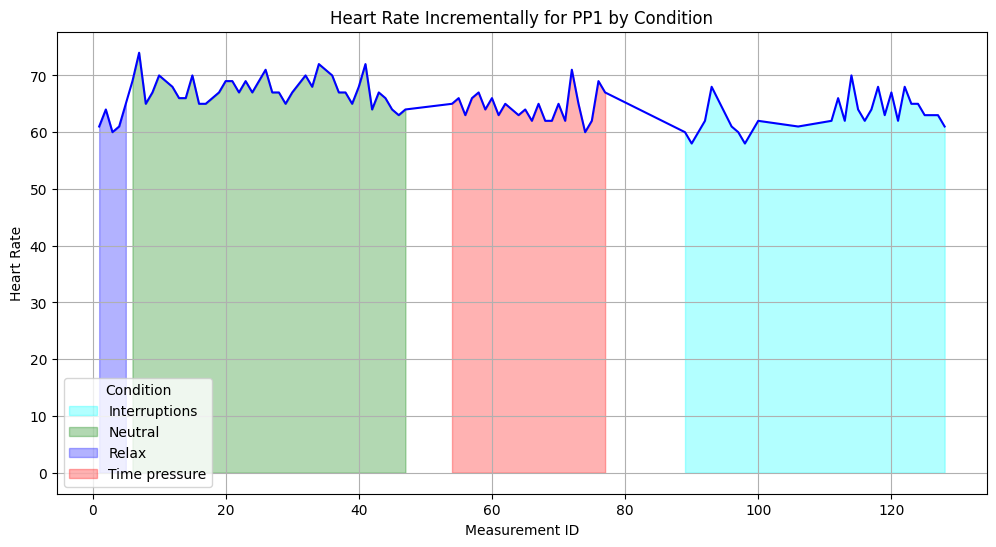

In [ ]:
# Unique conditions in the dataset
conditions = df['Condition_Name'].unique()

# Colors for the conditions - assuming a limited number of conditions, we choose a set of distinct colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
color_map = dict(zip(conditions, colors[:len(conditions)]))

plt.figure(figsize=(12, 6))

# Plotting each condition with a different color
for condition, group_df in df.groupby('Condition_Name'):
    plt.fill_between(group_df.index, group_df['HR'], label=condition, color=color_map[condition], alpha=0.3)
plt.plot(df.index, df['HR'], color='blue') # marker='o', linestyle='-', markersize=1,
plt.title('Heart Rate Incrementally for PP1 by Condition')
plt.xlabel('Measurement ID')
plt.ylabel('Heart Rate')
plt.legend(title='Condition')
#plt.tight_layout()
plt.grid()

plt.show()

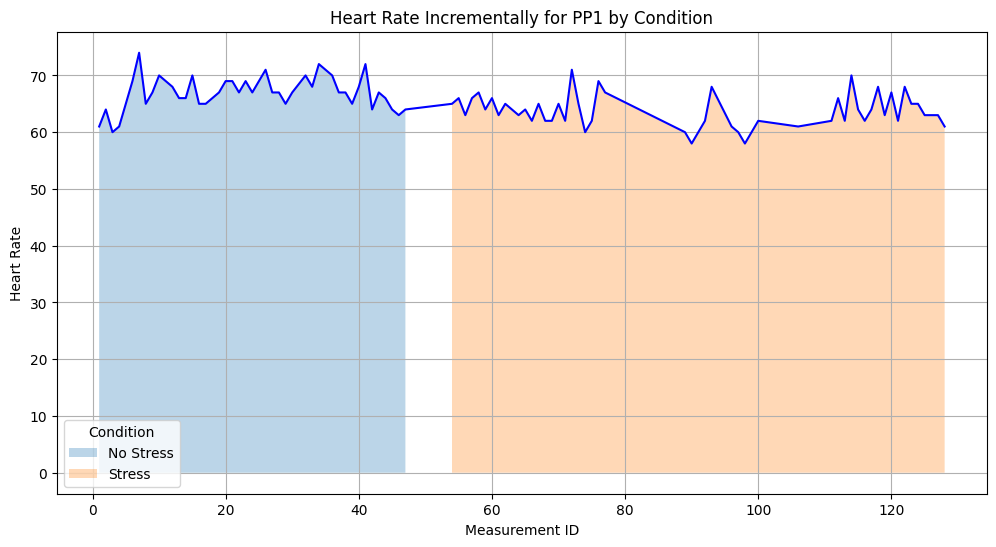

In [ ]:
# Unique conditions in the dataset
stress = df['Stress_Name'].unique()

# Colors for the conditions - assuming a limited number of conditions, we choose a set of distinct colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
color_map = dict(zip(stress, colors[:len(stress)]))

plt.figure(figsize=(12, 6))

# Plotting each condition with a different color
for stress, group_df in df.groupby('Stress_Name'):
    plt.fill_between(group_df.index, group_df['HR'], label=stress, alpha=0.3)
plt.plot(df.index, df['HR'], color='blue') # marker='o', linestyle='-', markersize=1,
plt.title('Heart Rate Incrementally for PP1 by Condition')
plt.xlabel('Measurement ID')
plt.ylabel('Heart Rate')
plt.legend(title='Condition')
#plt.tight_layout()
plt.grid()

plt.show()